In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def show_digit_samples(digit):
    """Simple function to show samples of a specific digit"""
    # Load model and data
    model = load_model('mnist_cnn_model.h5')
    (_, _), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    true_labels = np.argmax(y_test, axis=1)
    
    # Find digit examples
    digit_indices = np.where(true_labels == digit)[0]
    if len(digit_indices) == 0:
        print(f"No examples of digit {digit} found!")
        return
    
    # Get best 5 samples
    digit_images = X_test[digit_indices]
    predictions = model.predict(digit_images, verbose=0)
    confidence_scores = predictions[:, digit]
    top_5_indices = np.argsort(confidence_scores)[-5:][::-1]
    selected_indices = digit_indices[top_5_indices]
    
    # Display with larger figure size
    fig = plt.figure(figsize=(20, 6))  # Increased from (15, 4) to (20, 6)
    fig.patch.set_facecolor('#f8f9fa')
    fig.suptitle(f'Generated images of digit {digit}', 
                fontsize=26, fontweight='bold', color='#2c3e50', y=0.90)  # Increased font size
    
    for i, idx in enumerate(selected_indices):
        ax = plt.subplot(1, 5, i+1)
        # Increased image size by reducing margins and increasing subplot area
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray', interpolation='nearest')
        ax.set_facecolor('black')
        ax.set_xticks([])
        ax.set_yticks([])
        
        for spine in ax.spines.values():
            spine.set_edgecolor('#34495e')
            spine.set_linewidth(3)  # Increased border width
        
        # Add confidence score to the title
        confidence = confidence_scores[top_5_indices[i]]
        ax.text(0.5, -0.15, f'Sample {i+1}\nConfidence: {confidence:.3f}', 
               transform=ax.transAxes, ha='center', va='top',
               fontsize=14, color='#2c3e50', weight='bold')  # Increased font size and made bold
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.80, bottom=0.15, left=0.02, right=0.98)  # Adjusted margins for better space usage
    plt.show()

Enter digit (0-9):  4


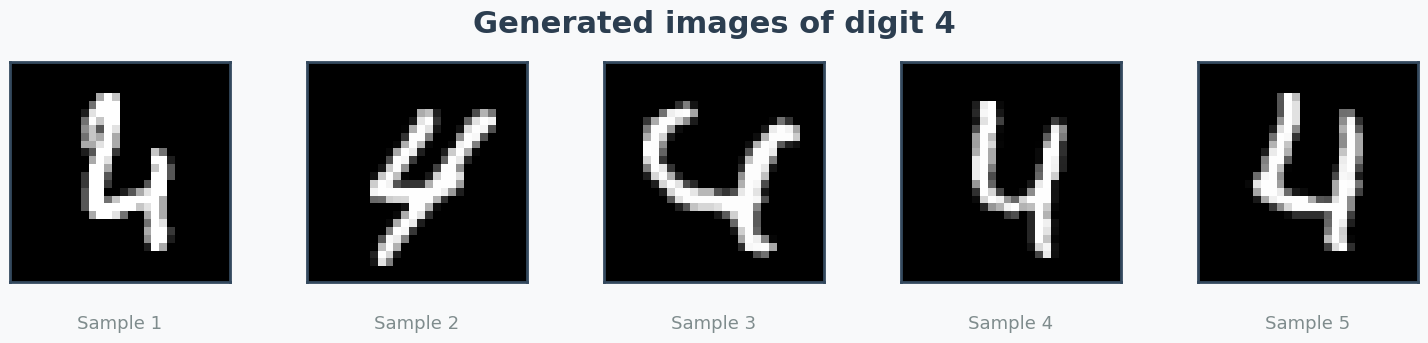

In [11]:
digit = int(input("Enter digit (0-9): "))
show_digit_samples(digit)